In [1]:
#Importing necessary packages
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import make_regression, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
!pip install umap-learn
import umap
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import savefig
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=3bd5a5c9d5a3167726c16f7c5c24639145bf9c19067d5f60ab6e0b5c4563b5c2
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=1df50e21c4cd2776389245ffc1063c32140d4b14638c46062cccf0d598595061
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [2]:
#Allowing Google Drive access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the file
path = '/content/drive/MyDrive/Colab Notebooks/01. MSiA421/421_Project/'
df = pd.read_csv(path+'data.csv')
df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


### Dimensionality Reduction Techniques

In [4]:
#Ordering data
df = df.sort_values(by=['Bankrupt?'], ascending=False).reset_index(drop=True)
df['Bankrupt?']

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [5]:
df_nolabel = df.drop(columns = ['Bankrupt?'], axis = 1)
df_nolabel

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.437089,0.466529,0.470207,0.595281,0.595281,0.998888,0.797224,0.809136,0.303406,0.781389,...,0.751652,0.001562,0.623239,0.595282,0.833238,0.290198,0.026689,0.564618,1,0.016470
2,0.416516,0.477976,0.474169,0.616981,0.616981,0.998903,0.796658,0.808718,0.302385,0.780927,...,0.764491,0.000891,0.623175,0.616975,0.836718,0.283286,0.026557,0.563721,1,0.021482
3,0.479745,0.545028,0.530060,0.619020,0.618235,0.999088,0.797430,0.809334,0.303347,0.781579,...,0.798701,0.003045,0.623882,0.619021,0.840290,0.281135,0.028226,0.568060,1,0.025232
4,0.491493,0.514828,0.531988,0.593768,0.593768,0.998888,0.797254,0.809188,0.303458,0.781422,...,0.783153,0.003999,0.624207,0.593765,0.839043,0.279303,0.026365,0.561751,1,0.031179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493979,0.557403,0.539162,0.600283,0.600283,0.999029,0.797479,0.809375,0.303555,0.781632,...,0.813228,0.006596,0.624072,0.600278,0.841557,0.280712,0.026791,0.565158,1,0.026284
6815,0.531029,0.620530,0.590877,0.618018,0.618018,0.999287,0.797820,0.809725,0.303611,0.781959,...,0.846191,0.016346,0.622752,0.618016,0.843601,0.278281,0.026825,0.565314,1,0.037125
6816,0.473895,0.538378,0.525617,0.610718,0.610718,0.999048,0.797556,0.809457,0.303649,0.781882,...,0.798702,0.006699,0.619432,0.610716,0.840237,0.278355,0.027696,0.567483,1,0.036579
6817,0.480183,0.559420,0.532470,0.600888,0.600881,0.999017,0.797555,0.809468,0.303713,0.781668,...,0.812442,0.029949,0.622418,0.600888,0.841502,0.280838,0.026846,0.565405,1,0.025955


In [6]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()

#Scaling original dataframe 
df_scaled = std_scaler.fit_transform(df_nolabel.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df_nolabel.columns)

In [7]:
#n to determine number of components to use
n = 2

#### 1. PCA

In [11]:
pca = PCA(n_components = n)
pca_fit = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = pca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_pca

,PC 1,PC 2
0,0.389698,-0.196544
1,-0.242322,-0.006432
2,-0.042063,-0.584700
3,-0.322651,-0.292538
4,0.802994,-0.095246
...,...,...
6814,-0.332206,0.153672
6815,-0.104850,-0.198883
6816,0.172466,0.029292
6817,0.139976,-0.033815


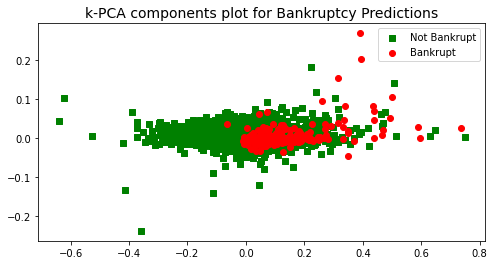

In [12]:
# Create plot from transformed dataset
X_pca = pca.fit(df_scaled.iloc[:, 0:n]).transform(df_scaled.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_pca[220:,0], X_pca[220:,1], color='green', marker='s', label='Not Bankrupt')
plt.scatter(X_pca[0:219,0], X_pca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("k-PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

#### 2. k-PCA

In [8]:
kpca = KernelPCA(n_components=n, kernel='rbf')
kpca_fit = kpca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = kpca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_pca

,PC 1,PC 2
0,0.055771,0.028667
1,-0.035291,0.000673
2,-0.006310,0.083623
3,-0.046616,0.041838
4,0.114956,0.014185
...,...,...
6814,-0.047369,-0.022180
6815,-0.015368,0.028462
6816,0.024734,-0.004002
6817,0.020046,0.004926


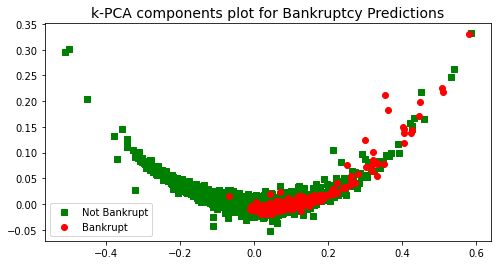

In [9]:
# Create plot from transformed dataset
X_kpca = kpca.fit(df_scaled.iloc[:, 0:n]).transform(df_scaled.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_kpca[220:,0], X_kpca[220:,1], color='green', marker='s', label='Not Bankrupt')
plt.scatter(X_kpca[0:219,0], X_kpca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("k-PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

#### 3. t-SNE

In [13]:
tsne = TSNE(n_components=n, learning_rate='auto', init='random', perplexity=3, method='exact')
tsne_fit = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data = tsne_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_tsne

KeyboardInterrupt: ignored

In [ ]:
plt.scatter(tsne_fit[:,0], tsne_fit[:,1], c=df['Bankrupt?'])
plt.title("t-SNE Embedding")

#### 4. U-MAP

In [14]:
umap_fn = umap.UMAP(n_components=n, metric='correlation')
umap_fit = umap_fn.fit_transform(df_scaled)
df_umap = pd.DataFrame(data = umap_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_umap

KeyboardInterrupt: ignored

In [ ]:
# Create plot from transformed dataset
import plotly.express as px
import plotly.graph_objects as go 

fig = px.scatter(
    umap_fit, x=0, y=1,
    color=df['Bankrupt?'], labels={'color': 'bankrupt_status'}
)

fig.update_layout(
    title=go.layout.Title(
        text="U-MAP Seperation",
        xref="paper",
        x=0
    ))

fig.show()

### To print to HTML

In [10]:
%%shell
jupyter nbconvert --to html /content/DR_v1.ipynb

[NbConvertApp] Converting notebook /content/DR_v1.ipynb to html
[NbConvertApp] Writing 330252 bytes to /content/DR_v1.html
